In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## Overview for liver

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 11.00it/s]


len                                                 mean  \
month            1     2     3     4     5     6    11    12          1   
period                                                                    
Control-2021  1402  3072  2286  2038  3002  1736  1587   477   8.035021   
Control-2022    80   270  1484  2011  2974  1736  1718   245   8.251250   
Test-2023       68   234  1487  2053  2979  1707  1753   260   8.847794   
Control-2021  1697  3972  3078  2836  3828  2604  2215  1009  17.377431   
Control-2022  1696  3976  3078  2835  3831  2608  2214  1008  18.448998   
Test-2023     1695  3973  3078  2834  3830  2607  2212  1008  20.439233   
Control-2021   482  1173  1012  1616  2509  1841   871   650  18.953320   
Control-2022   294   680   944  1645  2552  1830   769   636  20.443878   
Test-2023      322   706  1012  1673  2579  1840   741   639  20.762422   
Control-2021  1695  3965  3078  2836  3827  2604  2215  1009  65.810619   
Control-2022  1692  3963  3077  2835  3773  2504  2214  1008  65.244385   
Test-2023     1695  3969  3078  2834  3772  2503  2212  1008  66.012979   
Control-2021   269   595   888  1587  2481  1827   834   619   8.122305   
Control-2022   281   628   915  1615  2467  1714   705   607   7.836299   
Test-2023      312   663   934  1636  2494  1724   705   608   8.524038   
Control-2021   469  1123   994  1589  2482  1829   834   620  74.043710   
Control-2022   282   631   915  1615  2467  1714   705   607  78.074468   
Test-2023      312   663   934  1636  2494  1724   705   608  72.195513   
Control-2021   269   595   888  1587  2481  1827   834   619  20.612639   
Control-2022   281   628   915  1615  2467  1714   705   607  20.524555   
Test-2023      312   663   934  1636  2494  1724   705   608  21.661699   
Control-2021  1697  3972  3077  2836  3828  2604  2215  1009  10.910401   
Control-2022  1696  3976  3078  2835  3831  2608  2214  1008  10.660200   
Test-2023     1695  3973  3078  2834  3830  2607  2212  1008  10.920855   
Control-2021  1697  3972  3077  2836  3828  2604  2215  1009   3.837684   
Control-2022  1696  3976  3078  2835  3831  2608  2214  1008   3.895342   
Test-2023     1695  3973  3078  2834  3830  2607  2212  1008   3.898879   
Control-2021  1697  3971  3077  2836  3828  2604  2215  1009   7.072717   
Control-2022  1695  3974  3076  2834  3831  2608  2185   998   6.765251   
Test-2023     1695  3971  3076  2628  3822  2587  2210  1008   7.021976   
Control-2021   469  1120   994  1589  2482  1829   834   620   4.464499   
Control-2022   282   631   915  1615  2467  1714   705   607   4.605674   
Test-2023      312   663   934  1636  2494  1724   705   608   5.121955   
Control-2021  1697  3967  3078  2836  3827  2604  2215  1009  65.829994   
Control-2022  1696  3972  3078  2835  3830  2608  2214  1008  64.523585   
Test-2023     1695  3969  3078  2834  3829  2607  2212  1008  63.397050   

                         ...   func_q5  func_q95                      \
month                 2  ...        12         1         2         3   
period                   ...                                           
Control-2021   8.679167  ...   4.32380   2.80000   3.01745   3.37075   
Control-2022   8.911296  ...   3.23420   4.07545   4.03330   5.00885   
Test-2023     10.183333  ...   4.42590   5.56365   5.30000   5.40000   
Control-2021  17.885574  ...   3.00000   5.00000   4.72450   5.00000   
Control-2022  18.762953  ...   2.00700   5.00000   5.00000   6.00000   
Test-2023     19.533979  ...   2.50350   5.00000   4.00000   5.00000   
Control-2021  19.411338  ...   9.32450  11.00000  10.00000  11.00000   
Control-2022  20.466912  ...  10.00000  11.00000  11.00000  11.00000   
Test-2023     20.865439  ...   8.00000  11.00000  12.00000  11.00000   
Control-2021  65.153594  ...  32.00800  34.09300  33.65800  35.23150   
Control-2022  64.804693  ...  28.02800  34.00000  32.00000  34.22200   
Test-2023     64.246662  ...  25.53150  35.09300  32.00000  33.23150   
Control-2

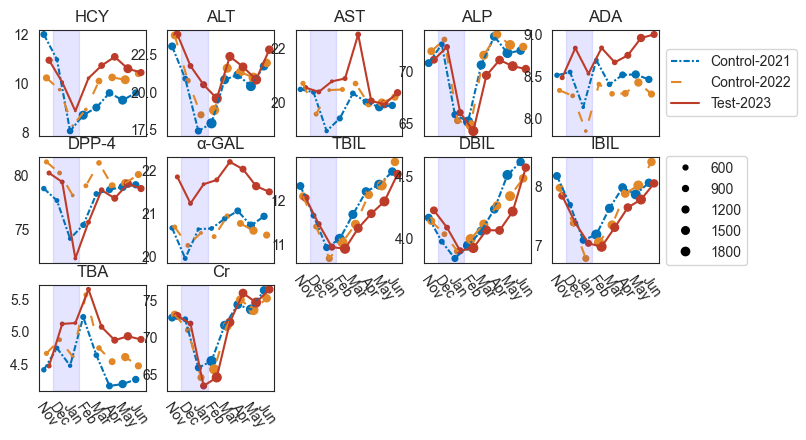

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"].isin(["BioChem-Liver", "BioChem-Metabolism"])]["item_id"])
l_tags = l_tags[0:3]+l_tags[4:]

l_months = [11,12,1,2,3,4,5,6]
plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)

fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure6_A.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure6_scatter.pdf")
df_res

## Focus on ALT by months

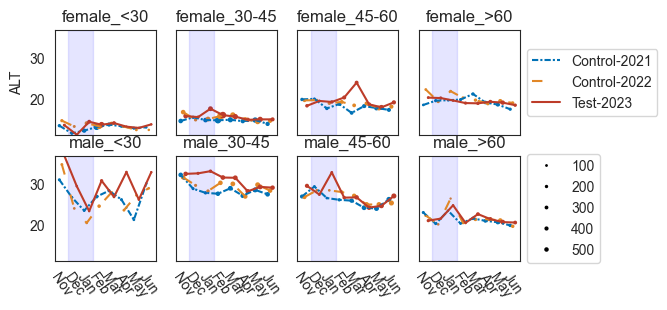

In [3]:
tag = "v0017"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.savefig(f"{workdir}/Figure6_D.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure6_ALT.pdf")

## Boxplot for TBIL

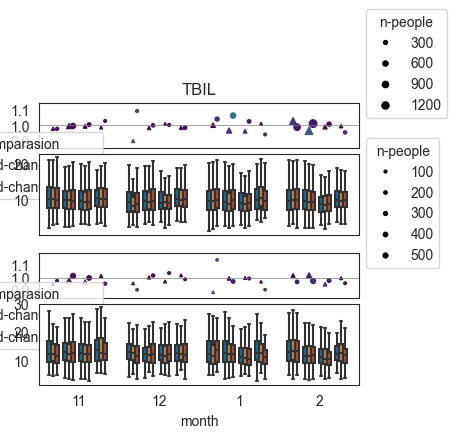

In [4]:
tag = "v0015"
plot_box = BxxPvalue(figsize=(4,3), rename_dict=rename_dict)
fig, df_scatter = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2], sns_type="boxplot"
)
fig.savefig(f"{workdir}/Figure6_E.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure6_TBIL-box.pdf")

## Other plots

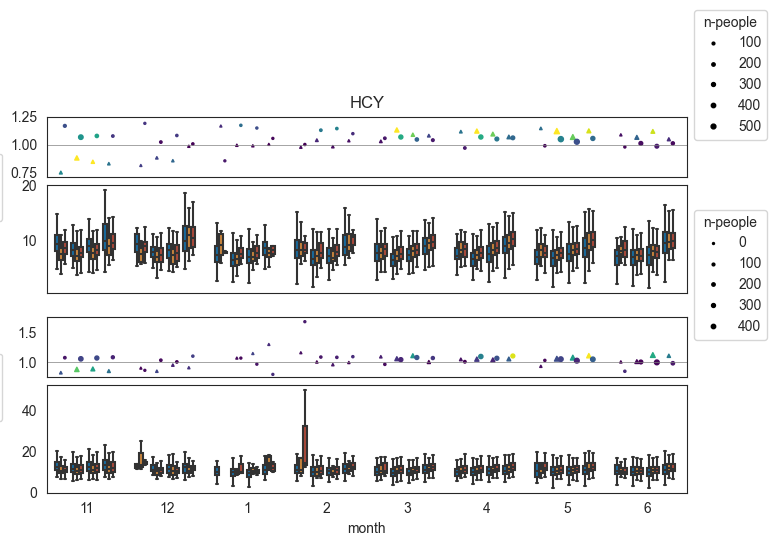

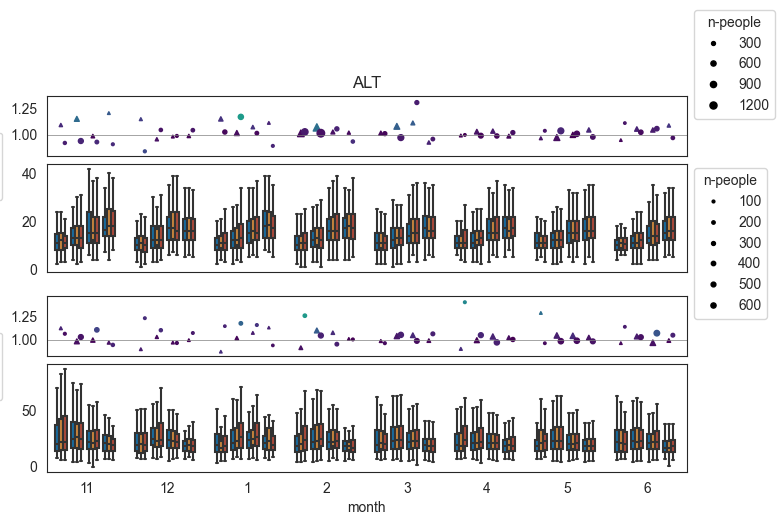

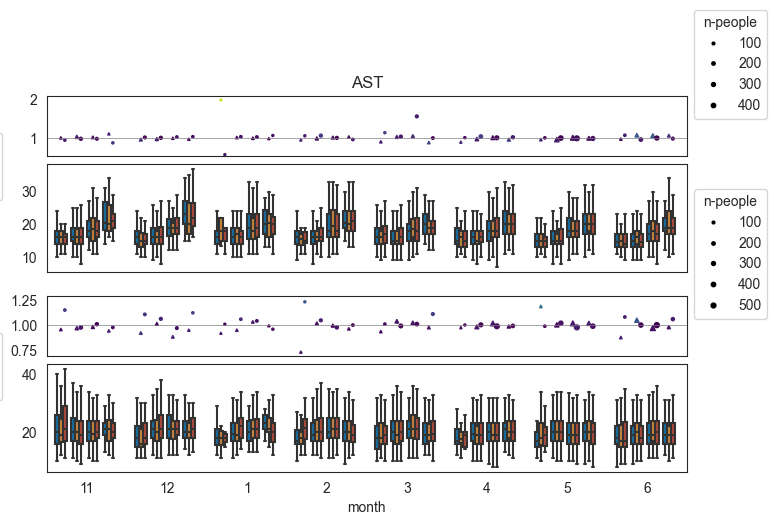

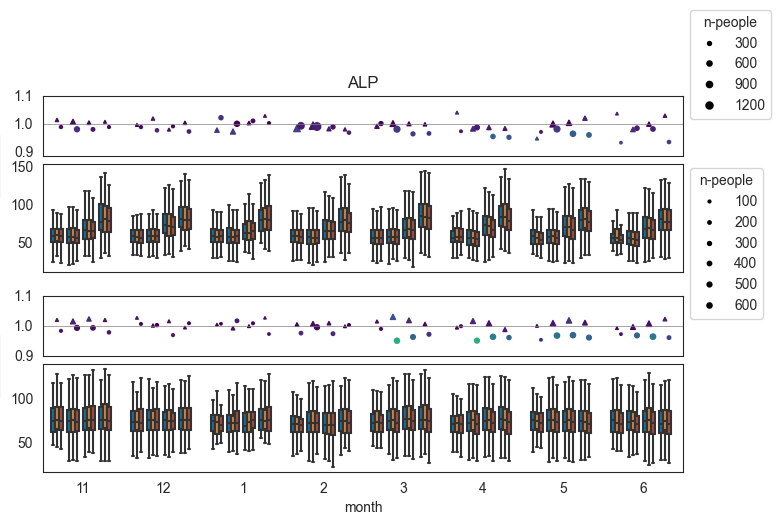

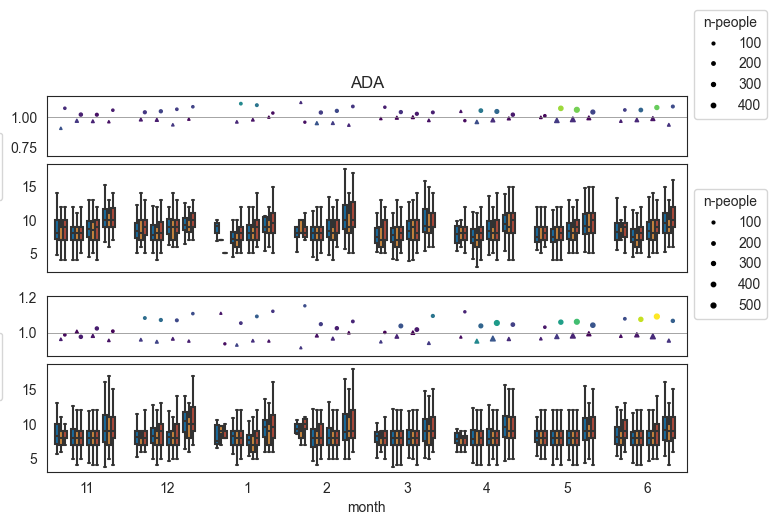

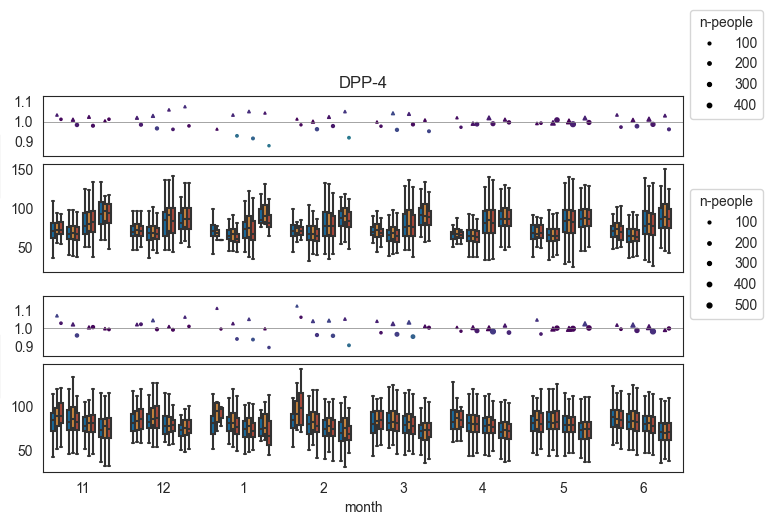

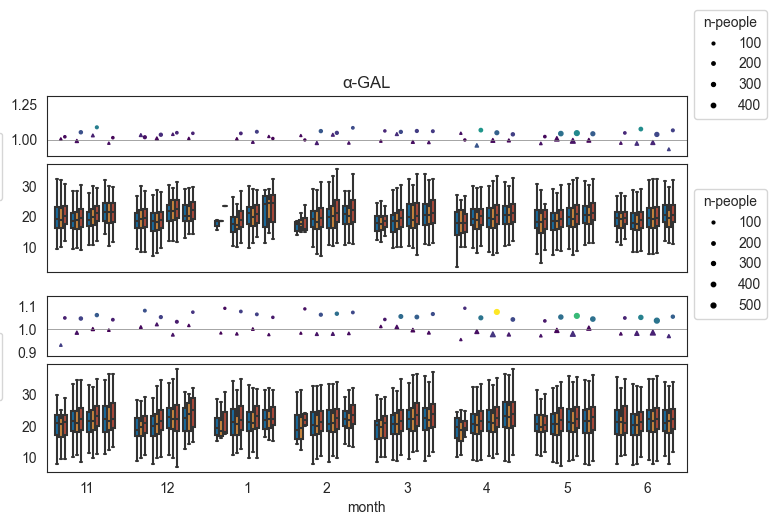

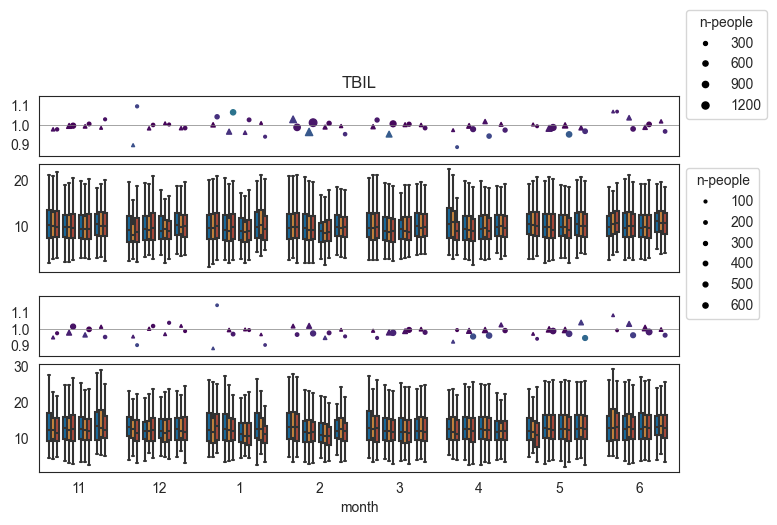

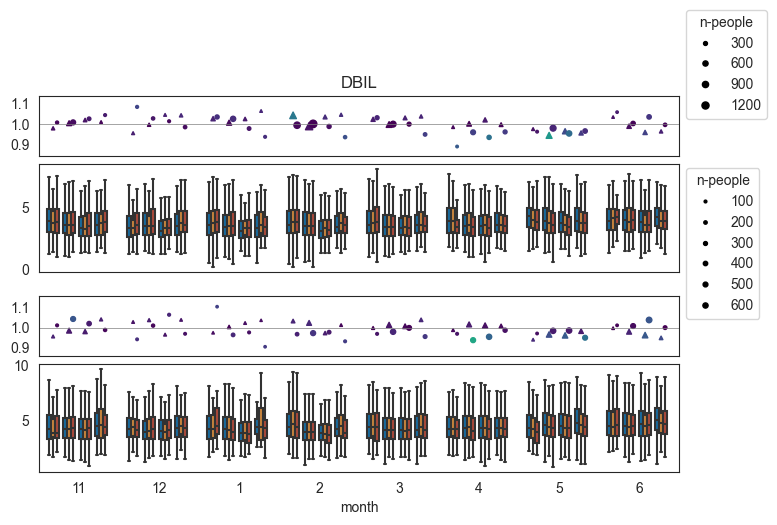

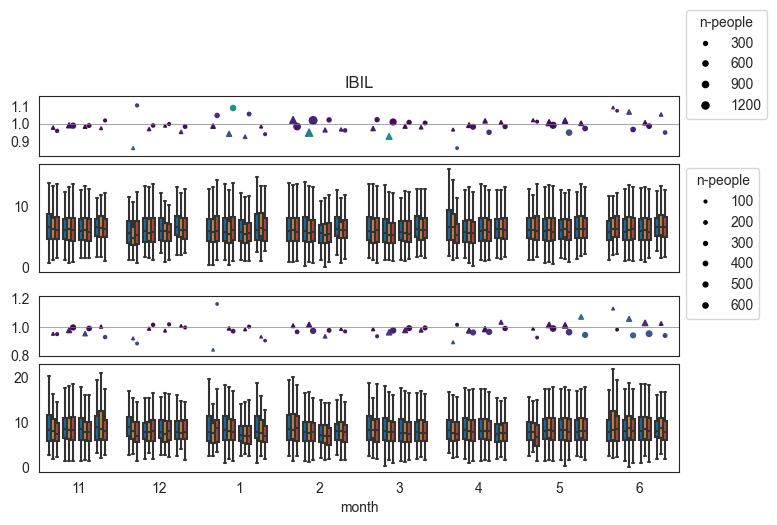

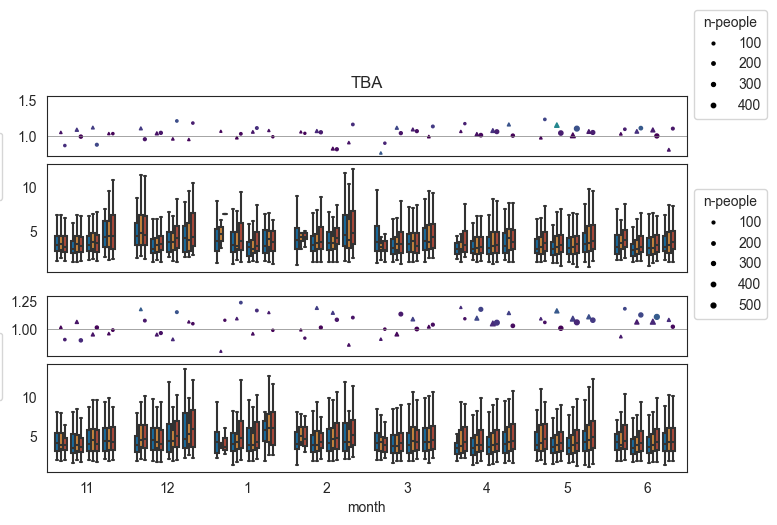

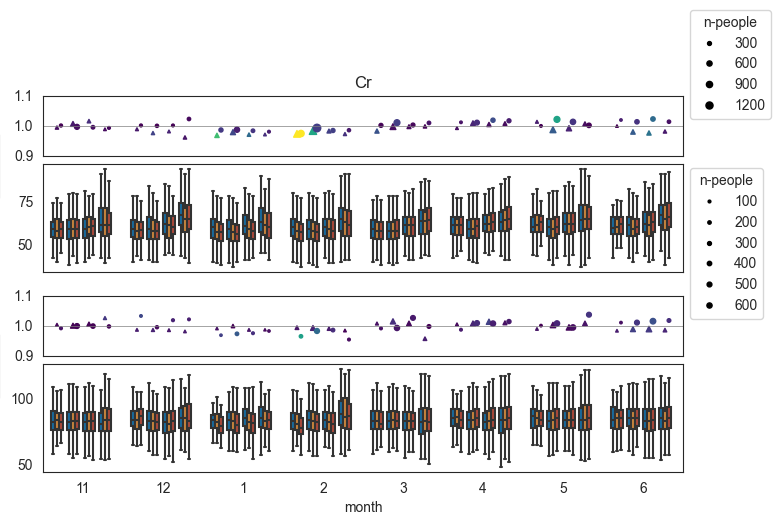

In [5]:
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)
for tag in l_tags:
    fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )

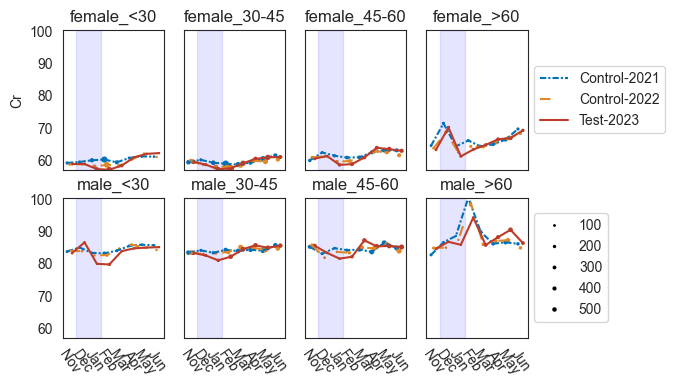

In [6]:
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)